In [1]:
# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (8,5.5)
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
#loading dataset and relabeling headers for easier manipulation
dataset = Table().read_table('Annual_Greenhouse_Gas_(GHG)_Air_Emissions_Accounts.csv')
dataset = dataset.relabel("F2010", "2010").relabel("F2011", "2011").relabel("F2012", "2012").relabel("F2013", "2013").relabel("F2014", "2014").relabel("F2015", "2015").relabel("F2016", "2016").relabel("F2017", "2017").relabel("F2018", "2018").relabel("F2019", "2019").relabel("F2020", "2020").relabel("F2021", "2021")

In [3]:
#making table for greenhouse gas emissions not focused industry types
greenhouse = dataset.where("Industry", "Total Industry and Households").drop("Industry")
greenhouse.show(5)

ObjectId2,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Gas_Type,Scale,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
32,Advanced Economies,nan,AETMP,Annual greenhouse gas (GHG) air emissions accounts,Million metric tons of CO2 equivalent,Organisation for Economic Co-operation and Development ( ...,ECNGA,Greenhouse Gas Emissions (GHG); Air Emissions Accounts,"Environment, Climate Change, Economic Activity, Greenhou ...",Carbon dioxide,Units,12715.9,12529.7,12323.2,12397.9,12215.5,12099.2,11946.5,11929.2,12006.3,11702.4,10718.4,11245.8
33,Advanced Economies,nan,AETMP,Annual greenhouse gas (GHG) air emissions accounts,Million metric tons of CO2 equivalent,Organisation for Economic Co-operation and Development ( ...,ECNGA,Greenhouse Gas Emissions (GHG); Air Emissions Accounts,"Environment, Climate Change, Economic Activity, Greenhou ...",Fluorinated gases,Units,35.779,38.0714,36.5465,39.2466,41.1007,43.2348,43.7091,44.2368,48.4153,49.9016,46.935,51.8943
34,Advanced Economies,nan,AETMP,Annual greenhouse gas (GHG) air emissions accounts,Million metric tons of CO2 equivalent,Organisation for Economic Co-operation and Development ( ...,ECNGA,Greenhouse Gas Emissions (GHG); Air Emissions Accounts,"Environment, Climate Change, Economic Activity, Greenhou ...",Greenhouse gas,Units,14933.7,14700.9,14454.6,14569.1,14390.5,14265.8,14077.1,14067.7,14161,13845.1,12706.1,13345.7
35,Advanced Economies,nan,AETMP,Annual greenhouse gas (GHG) air emissions accounts,Million metric tons of CO2 equivalent,Organisation for Economic Co-operation and Development ( ...,ECNGA,Greenhouse Gas Emissions (GHG); Air Emissions Accounts,"Environment, Climate Change, Economic Activity, Greenhou ...",Methane,Units,1417.86,1383.57,1372.72,1362.71,1351.82,1347.1,1328.91,1336.24,1340.52,1332.06,1238.31,1312.13
36,Advanced Economies,nan,AETMP,Annual greenhouse gas (GHG) air emissions accounts,Million metric tons of CO2 equivalent,Organisation for Economic Co-operation and Development ( ...,ECNGA,Greenhouse Gas Emissions (GHG); Air Emissions Accounts,"Environment, Climate Change, Economic Activity, Greenhou ...",Nitrous oxide,Units,764.182,749.513,722.187,769.287,782.126,776.222,758.034,758.057,765.798,760.774,702.441,735.857


In [4]:
#making table grouped by country for greenhouse gas emissions
grouped_greenhouse = greenhouse.where("Gas_Type", "Greenhouse gas").group("Country", np.average)
grouped_greenhouse.show()
countries = grouped_greenhouse.column("Country")

Country,ObjectId2 average,ISO2 average,ISO3 average,Indicator average,Unit average,Source average,CTS_Code average,CTS_Name average,CTS_Full_Descriptor average,Gas_Type average,Scale average,2010 average,2011 average,2012 average,2013 average,2014 average,2015 average,2016 average,2017 average,2018 average,2019 average,2020 average,2021 average
Advanced Economies,34,nan,,,,,,,,,,14933.7,14700.9,14454.6,14569.1,14390.5,14265.8,14077.1,14067.7,14161,13845.1,12706.1,13345.7
Africa,78,nan,,,,,,,,,,2693.93,2689.64,2822.89,2875.85,2952.12,2975.17,3019.84,3088.29,3192.44,3213.01,2962.48,3039.75
Americas,122,nan,,,,,,,,,,10957,10872.6,10755.8,10972.9,11068.6,10889.8,10709,10673.3,10838.6,10657.6,9586.52,10075.6
Asia,286,nan,,,,,,,,,,23247.9,24664.7,25469.7,25985.5,26443.9,26519.2,26779.3,27391.4,28051.3,28762.6,28221.8,30543.2
Australia and New Zealand,331,nan,,,,,,,,,,651.404,654.436,659.938,648.632,647.917,659.509,668.474,678.531,679.07,680.774,631.045,663.234
Central Asia,376,nan,,,,,,,,,,596.391,613.388,635.776,633.374,670.023,673.034,664.477,689.817,706.975,694.864,685.282,547.288
Eastern Asia,421,nan,,,,,,,,,,13993.8,15072.4,15466.8,15807.2,15830.5,15707.7,15708.5,15937.2,16265.7,16605.5,16651.9,17986.8
Eastern Europe,465,nan,,,,,,,,,,3345.69,3432.77,3409.08,3313.02,3256.13,3219.43,3251.5,3286.33,3354.17,3298.4,3123.21,3328.66
Emerging and Developing Economies,509,nan,,,,,,,,,,30288.6,31790.1,32791.2,33274.3,33840.8,33870.3,34186.9,34892.6,35737.1,36418.3,35229.3,37994
Europe,553,nan,,,,,,,,,,7672.05,7609.61,7537.43,7360.56,7118.79,7092.37,7087.45,7128.75,7136.78,6949.53,6533.55,7017.9


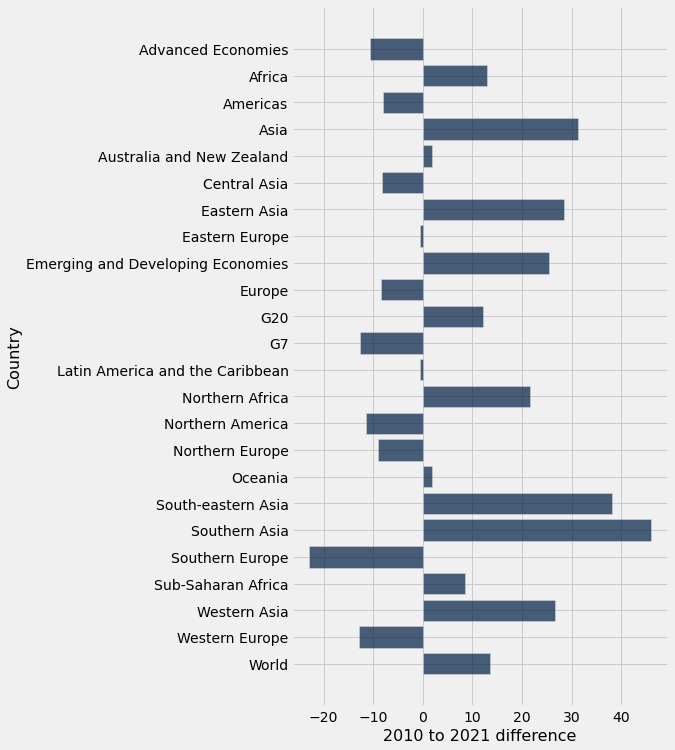

In [5]:
#making graph showing how greenhouse gas emissions changed over the past decade
average_emissions_year_country_grouped = grouped_greenhouse.select("Country", "2010 average", "2011 average", "2012 average", "2013 average", "2014 average", "2015 average", "2016 average", "2017 average", "2018 average", "2019 average", "2020 average", "2021 average")
average_emissions_year_country_grouped.with_column("2010 to 2021 difference", 100 * (average_emissions_year_country_grouped.column("2021 average") - average_emissions_year_country_grouped.column("2010 average"))/average_emissions_year_country_grouped.column("2010 average")).barh("Country", "2010 to 2021 difference")

In [6]:
#making tables for easier modeling based on gas type
gas_grouped = greenhouse.group("Gas_Type", np.average)
country_and_gas_grouped = greenhouse.group(["Country", "Gas_Type"], np.average)

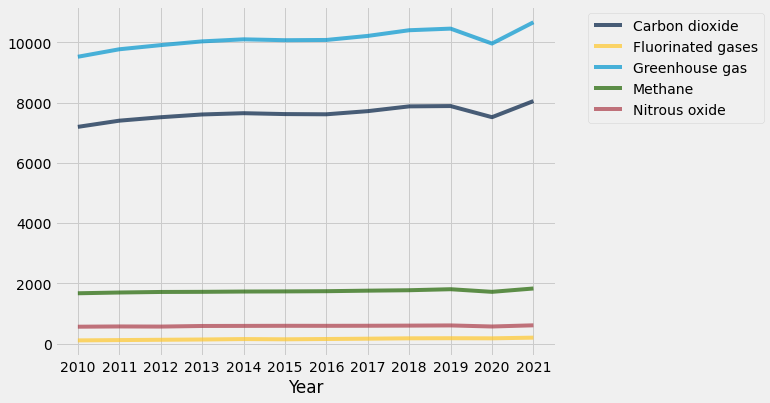

In [7]:
#making graph of year vs emissions sorted by gas type
years = ["20"+str(k) for k in np.arange(10,22,1)]
flipped = Table().with_column("Year", years)
for gas_type in gas_grouped.column("Gas_Type"):
    averages = make_array()
    for year in years:
        year += " average"
        averages = np.append(averages, gas_grouped.where("Gas_Type", gas_type).column(year).item(0))
    flipped = flipped.with_column(gas_type, averages)
flipped.plot("Year", width=8)

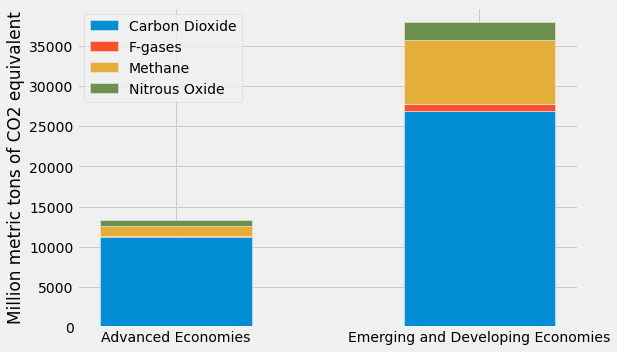

In [8]:
#making graph which shows how much each type of gas contributes to the total greenhouse gas emissions
graphable = country_and_gas_grouped.select("Country", "Gas_Type", "2010 average", "2011 average", "2012 average", "2013 average", "2014 average", "2015 average", "2016 average", "2017 average", "2018 average", "2019 average", "2020 average", "2021 average")
#Western Europe F-gases
graphable = graphable.with_row(["Western Europe", "Fluorinated gases", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
#Northern Europe F-gases
graphable = graphable.with_row(["Northern Europe", "Fluorinated gases", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
picked_countries = ["Advanced Economies", "Emerging and Developing Economies"]
picked_countries = sorted(picked_countries)
graphable = graphable.where("Country", are.contained_in(picked_countries))
co2 = graphable.where("Gas_Type", "Carbon dioxide").column("2021 average")
f_gas = graphable.where("Gas_Type", "Fluorinated gases").column("2021 average")
methane = graphable.where("Gas_Type", "Methane").column("2021 average")
n2o = graphable.where("Gas_Type", "Nitrous oxide").column("2021 average")
gh_gas = graphable.where("Gas_Type", "Greenhouse gas").column("2021 average")


#define chart parameters
N = len(co2)
barWidth = .5
xloc = np.arange(N)

#create stacked bar chart
p1 = plt.bar(xloc, co2, width=barWidth)
p2 = plt.bar(xloc, f_gas, bottom=co2, width=barWidth)
p3 = plt.bar(xloc, methane, bottom=co2+f_gas, width=barWidth)
p4 = plt.bar(xloc, n2o, bottom=co2+f_gas+methane, width=barWidth)


#add labels, title, tick marks, and legend
plt.ylabel('Million metric tons of CO2 equivalent')
plt.xticks(xloc, picked_countries)
plt.legend((p1[0], p2[0], p3[0], p4[0]), ("Carbon Dioxide", "F-gases", "Methane", "Nitrous Oxide"))

#display chart
plt.show()

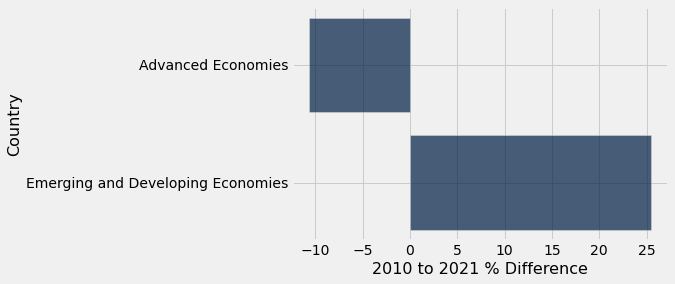

In [9]:
#plots the %difference of emssions from 2010 to 2021 between advanced economies and emerging economies
greenhouse_gas_per_country_diff = country_and_gas_grouped.where("Gas_Type", "Greenhouse gas")
greenhouse_gas_per_country_diff = greenhouse_gas_per_country_diff.with_column("2010 to 2021 % Difference", 100 * (greenhouse_gas_per_country_diff.column("2021 average") - greenhouse_gas_per_country_diff.column("2010 average"))/greenhouse_gas_per_country_diff.column("2010 average"))
greenhouse_gas_per_country_diff.where("Country", are.contained_in(picked_countries)).barh("Country", "2010 to 2021 % Difference")

In [10]:
#making table useful for dealing with indsutries
industry = dataset.group(["Industry", "Gas_Type"], np.average).where("Industry", are.not_equal_to("Total Industry and Households"))
industry

Industry,Gas_Type,ObjectId2 average,Country average,ISO2 average,ISO3 average,Indicator average,Unit average,Source average,CTS_Code average,CTS_Name average,CTS_Full_Descriptor average,Scale average,2010 average,2011 average,2012 average,2013 average,2014 average,2015 average,2016 average,2017 average,2018 average,2019 average,2020 average,2021 average
"Agriculture, Forestry and Fishing",Carbon dioxide,609.167,,nan,,,,,,,,,81.3086,82.0673,78.6556,79.4074,80.5739,80.3999,80.86,80.8915,81.1076,80.949,79.231,84.4993
"Agriculture, Forestry and Fishing",Greenhouse gas,610.167,,nan,,,,,,,,,1236.87,1247.24,1245.91,1269.19,1274.61,1284.24,1291.37,1297.03,1303.19,1325.02,1256.09,1338.23
"Agriculture, Forestry and Fishing",Methane,611.167,,nan,,,,,,,,,734.05,737.683,743.427,747.165,749.861,755.47,763.631,768.899,772.256,787.153,745.95,794.338
"Agriculture, Forestry and Fishing",Nitrous oxide,612.167,,nan,,,,,,,,,421.51,427.492,423.826,442.616,444.175,448.374,446.876,447.241,449.822,456.914,430.914,459.395
Construction,Carbon dioxide,613.167,,nan,,,,,,,,,420.556,428.352,436.366,442.396,447.306,449.175,443.61,443.284,451.154,459.148,446.665,464.053
Construction,Greenhouse gas,614.167,,nan,,,,,,,,,556.356,568.951,580.146,585.468,591.855,594.382,590.015,591.924,601.08,612.713,594.349,614.002
Construction,Methane,615.167,,nan,,,,,,,,,133.364,138.128,141.322,140.65,142.136,142.805,144.069,146.352,147.647,151.271,145.485,147.629
Construction,Nitrous oxide,616.167,,nan,,,,,,,,,2.43581,2.47054,2.4584,2.42234,2.41234,2.40121,2.33737,2.28773,2.27876,2.29391,2.19846,2.32027
"Electricity, Gas, Steam and Air Conditioning Supply",Carbon dioxide,617.167,,nan,,,,,,,,,2613.6,2720.25,2778.96,2821.14,2818.75,2768.08,2763.47,2801.23,2842.83,2796.8,2700.45,2888.72
"Electricity, Gas, Steam and Air Conditioning Supply",Greenhouse gas,618.167,,nan,,,,,,,,,2676.54,2782.2,2839.2,2881.93,2878.68,2829.34,2826.61,2861.39,2902.02,2855.88,2757.85,2949.85


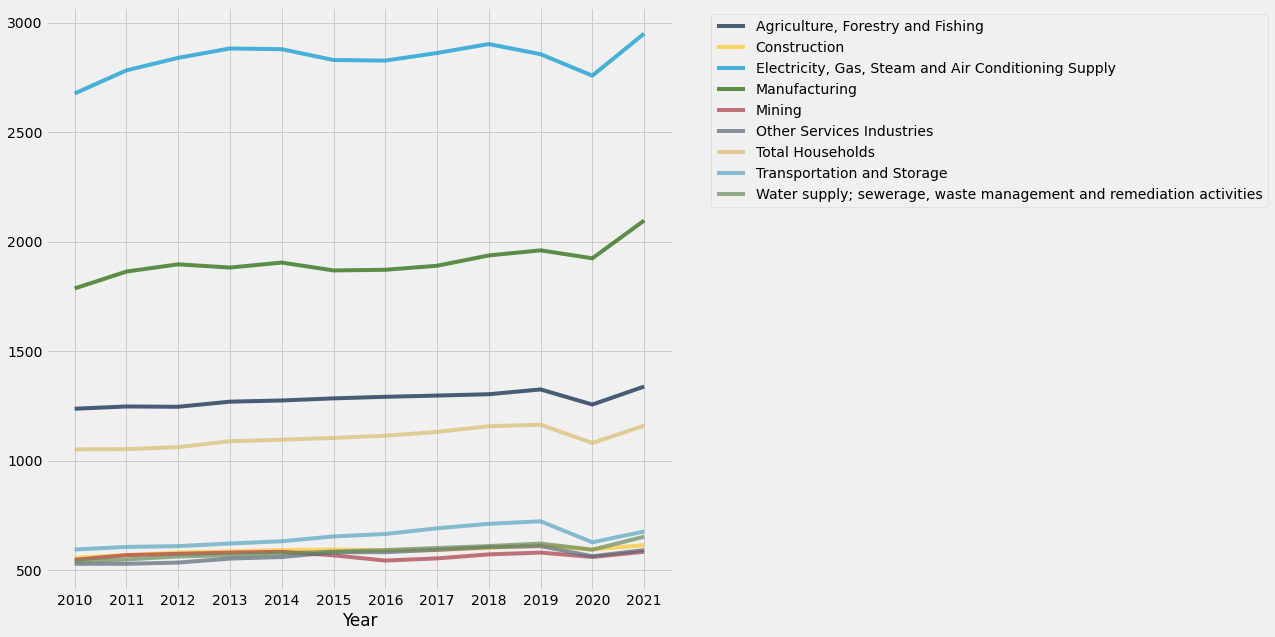

In [11]:
#making graph of year vs emissions sorted by industry
industry_grouped = industry.where("Gas_Type", "Greenhouse gas").select("Industry", "2010 average", "2011 average", "2012 average", "2013 average", "2014 average", "2015 average", "2016 average", "2017 average", "2018 average", "2019 average", "2020 average", "2021 average")
years = ["20"+str(k) for k in np.arange(10,22,1)]
flipped_industry = Table().with_column("Year", years)
for industry in industry_grouped.column("Industry"):
    averages = make_array()
    for year in years:
        year += " average"
        averages = np.append(averages, industry_grouped.where("Industry", industry).column(year).item(0))
    flipped_industry = flipped_industry.with_column(industry, averages)
flipped_industry.plot("Year", width=10, height=10)
